In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_data = pd.read_csv('training_data_VT2026.csv')

color = training_data['increase_stock'].map({'high_bike_demand': 'red', 'low_bike_demand': 'blue'})
# Röd om high_demand, blå om low demand
training_data['increase_stock'] = training_data['increase_stock'].map({'high_bike_demand': True, 'low_bike_demand': False}) 
#High demand = True, Low demand = False


print(training_data)
print(training_data.info())

      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1597           13            0      3        0        1           1  13.9   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0        0           0   4.2   

       dew  humidity  precip  snow  snowdepth  windspeed  cloudcover  \
0  

<Axes: xlabel='hour_of_day', ylabel='Share of high demand'>

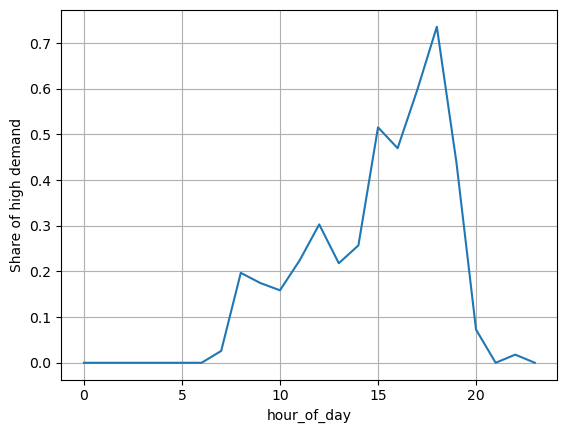

In [3]:
# Can any trend be seen comparing different hours, weeks, and months?

x_axis = 'hour_of_day'
share_true = training_data.groupby(x_axis)['increase_stock'].mean()
share_true.plot(ylabel = 'Share of high demand', grid = True)


<Axes: xlabel='day_of_week', ylabel='Share of high demand'>

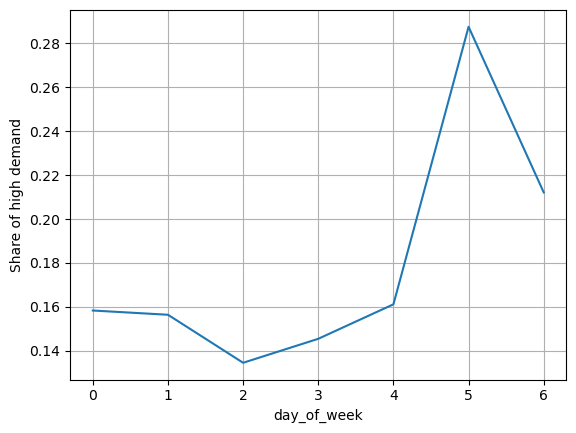

In [4]:

x_axis = 'day_of_week'
share_true = training_data.groupby(x_axis)['increase_stock'].mean()
share_true.plot(ylabel = 'Share of high demand', grid = True)

<Axes: xlabel='month', ylabel='Share of high demand'>

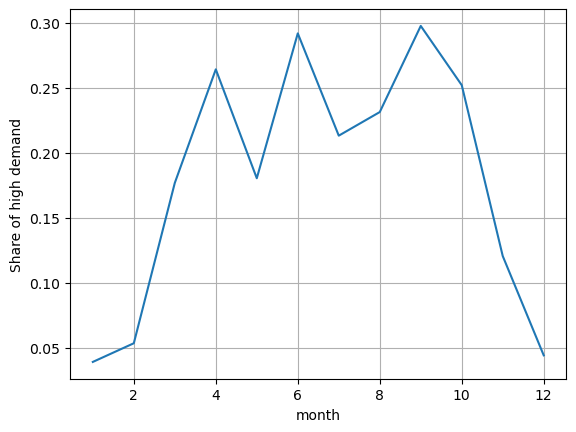

In [5]:

x_axis = 'month'
share_true = training_data.groupby(x_axis)['increase_stock'].mean()
share_true.plot(ylabel = 'Share of high demand', grid = True)

Högt efterfrågan under eftermiddagen, främst på helgerna, under april - oktober

In [6]:
# Is there any difference between weekdays and holidays?

share_true_weekday = training_data.groupby('weekday')['increase_stock'].mean()
share_true_holiday = training_data.groupby('holiday')['increase_stock'].mean()

print(share_true_weekday)
print(share_true_holiday)


weekday
0    0.250000
1    0.151408
Name: increase_stock, dtype: float64
holiday
0    0.180349
1    0.169811
Name: increase_stock, dtype: float64


<Axes: xlabel='hour_of_day', ylabel='temp'>

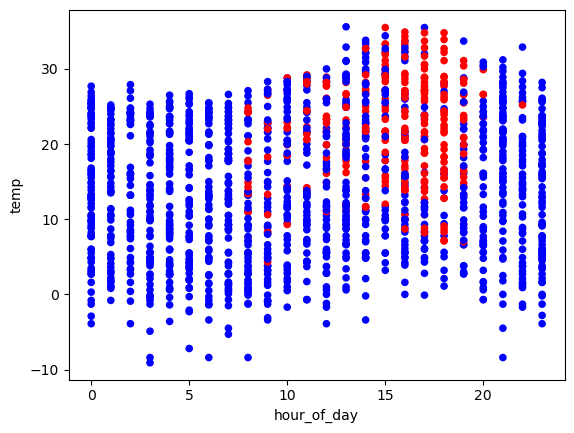

In [7]:
# Is there any trend depending on the weather? Rainy days, snowy days, etc.


training_data.plot(x = 'hour_of_day', y = 'temp', kind = 'scatter', color = color)


Finns inget i 'snow'

Starkt korrelation med temperatur - varmare -> högre efterfrågan

I stort sett aldrig hög efterfrågan vid någon nivå av regn eller fallen snö

Ingen stor påverkan av luftfuktighet, daggpunkt (dew), vindhastighet, molnighet eller visibility





In [8]:
# Heath index
def heat_index(T, R):
    """
    Beräkna Heat Index
    T: temperatur i °C
    R: relativ luftfuktighet i %
    Returnerar: HI i °C
    """

    HI = (
        T - 0.22475541 * (100 - R)
        - 0.00683783 * T**2
        - 0.05481717 * R**2
        + 0.00122874 * T**2 * R
        + 0.00085282 * T * R**2
        - 0.00000199 * T**2 * R**2
    )

    return HI

training_data['heat_index'] = heat_index(training_data['temp'], training_data['humidity'])



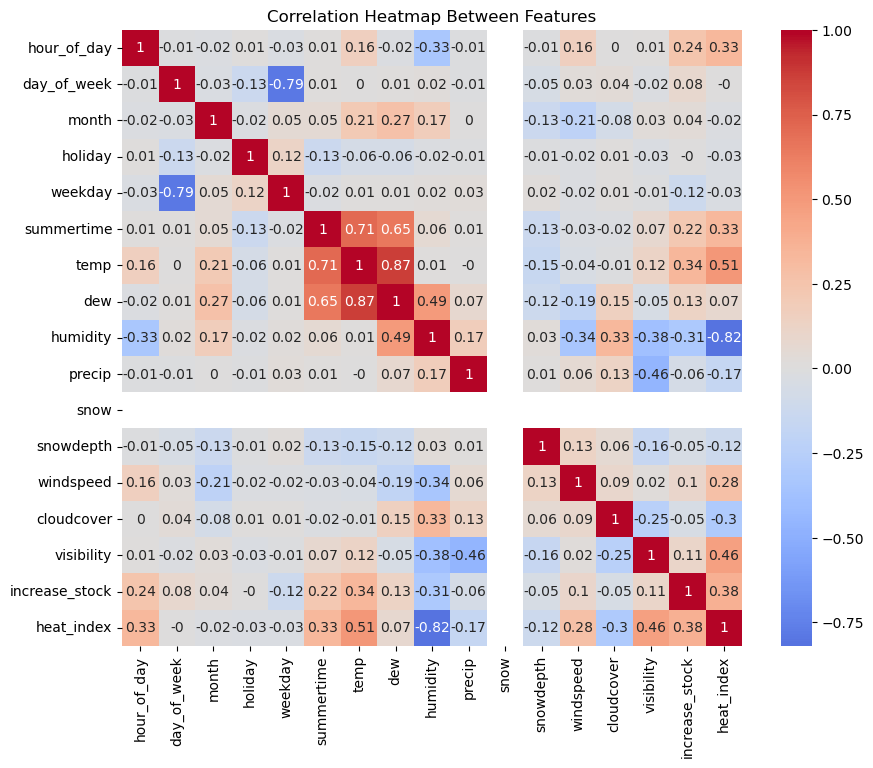

In [9]:
corr = np.round(training_data.corr(), 2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap Between Features")
plt.show()
